In [1]:
#Imports
from matplotlib import pyplot as plt
import time
import numpy
from zmqRemoteApi import RemoteAPIClient

from scipy import stats

In [2]:
client = RemoteAPIClient()
sim = client.getObject('sim')
client.setStepping(True)
bill = sim.getObject('./Bill/Bill')
robot = sim.getObject('./Omnirob')

In [3]:
#log timestamps and distance for a simulation
def simulate():
    sim.boolparam_display_enabled = False
    sim.intparam_speedmodifier = 100
    timestamps = []
    resultData = []

    sim.startSimulation()

    startRobotPos = sim.getObjectPosition(robot,sim.handle_world)
    startRobotPos[0] += (-4 + numpy.random.random()*8)

    sim.setObjectPosition(robot, sim.handle_world,startRobotPos)

    while (t := sim.getSimulationTime()) < 3:
        s = f'Simulation time: {t:.2f} [s]'
        pos1 = sim.getObjectPosition(bill,sim.handle_world)
        pos2 = sim.getObjectPosition(robot,sim.handle_world)
        dist = numpy.linalg.norm(numpy.subtract(pos1,pos2))
        resultData.append(dist)
        timestamps.append(t)
        client.step()
    sim.stopSimulation()
    return resultData

In [4]:
# Run a monte carlo simulation

def mc_sim(passes):
    minimums = []
    for i in range(0,passes):
        results = simulate()
        minimums.append(min(results))
        time.sleep(0.2)
    return minimums

Text(0.5, 1.0, 'Line')

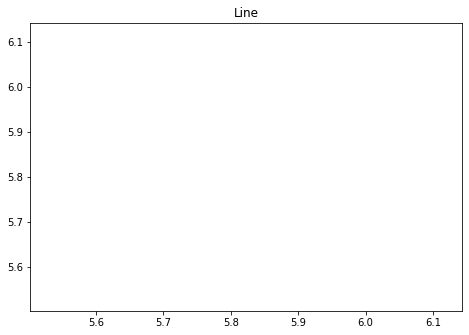

In [5]:
#Run a simple simulation and plot the distance
pass
results = simulate()
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(results[0], results[1])
ax.set_title("Line")

[3.3427796861133605, 3.089366816602883, 3.3983535257505335, 3.2679550216664475, 3.5295903747721664]


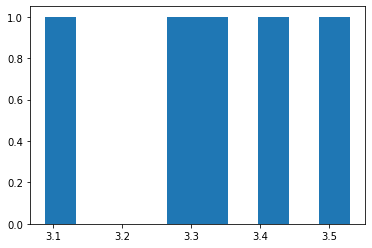

In [6]:
mins = mc_sim(5)
print(mins)
hist = plt.hist(mins)